In [1]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets
from PIL import Image
import seaborn as sns

In [4]:
# Path
path = Path("/kaggle/input/labeled-chest-xray-images/chest_xray/train/")
fls = get_image_files(path)

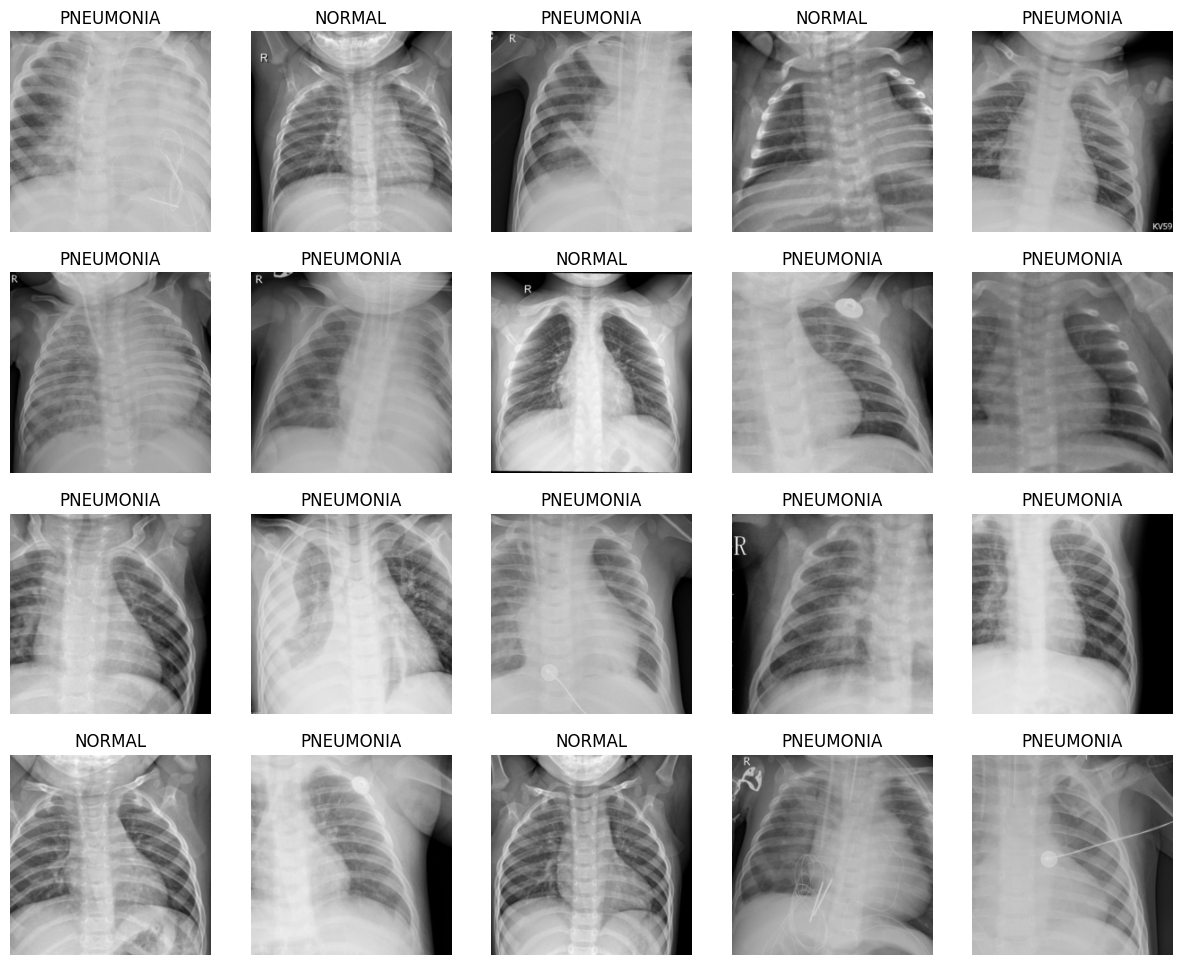

In [5]:
results = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=30),
    get_y = parent_label,
    item_tfms=Resize(224)
)

# Data loader
dls = results.dataloaders(path)

# check dataset
dls.train.show_batch(max_n=20, nrows=4)

In [6]:
# Learn & Train
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 142MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,0.447399,0.184845,0.947419,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.163014,0.121986,0.971319,00:52
1,0.090827,0.059448,0.982792,00:52
2,0.053890,0.053732,0.986616,00:52


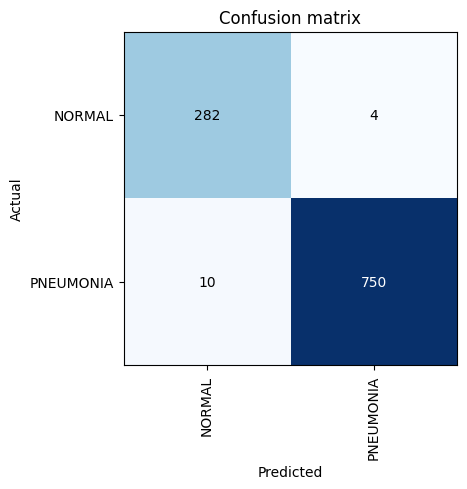

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

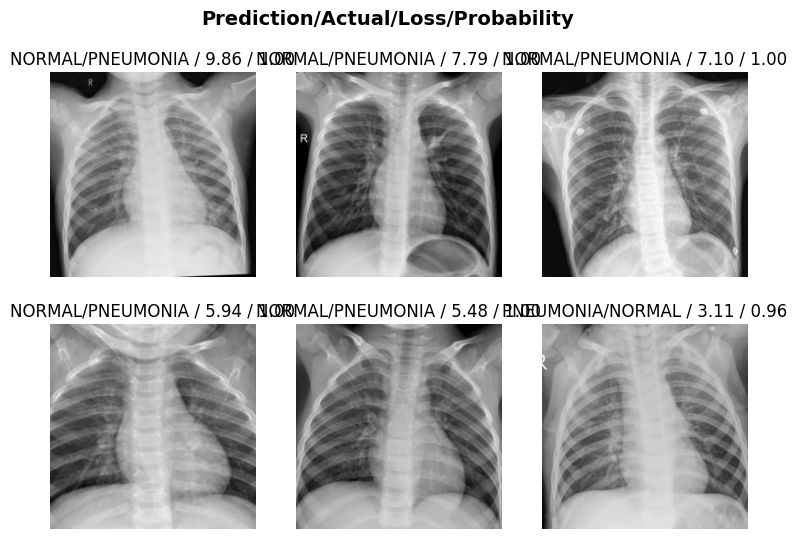

In [8]:
# Top Losses
interp.plot_top_losses(6, nrows=2)

In [24]:
path_test = Path("/kaggle/input/labeled-chest-xray-images/chest_xray/test/")
fls_test = get_image_files(path_test)
fls_test

(#624) [Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9364007-0003.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-9476607-0001.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-2831144-0001.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-7720431-0003.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-1514320-0002.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-6950003-0003.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-874167-0001.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/VIRUS-4276353-0001.jpeg'),Path('/kaggle/input/labeled-chest-xray-images/chest_xray/test/PNEUMONIA/BACTERIA-9857270-0004.jp

In [49]:
# Assuming fls[5] is a PosixPath object
parent_dir_name = fls[20].parent.name
print(parent_dir_name)

PNEUMONIA


In [50]:
learn.predict(fls[20])

('PNEUMONIA', tensor(1), tensor([5.1122e-04, 9.9949e-01]))

In [51]:
torch.save(learn, 'model.pkl')